In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/autoscout24.csv")

In [3]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [4]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


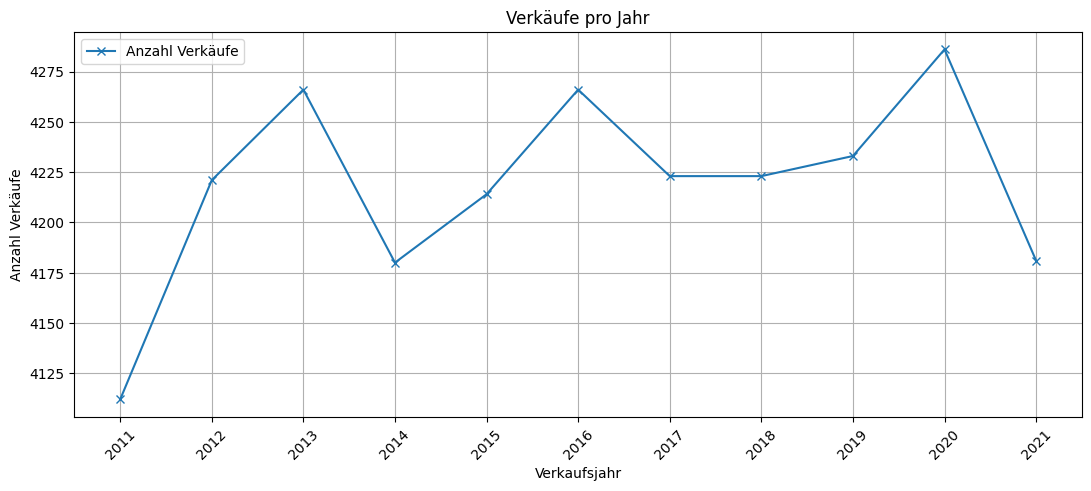

In [6]:
sales_per_year = df["year"].value_counts().sort_index()
plt.figure(figsize=(13,5))
plt.plot(
    sales_per_year.index,
    sales_per_year.values,
    marker = "x",
    linestyle="-",
    label="Anzahl Verkäufe"
)

plt.xticks(sales_per_year.index, rotation=45)
plt.xlabel("Verkaufsjahr")
plt.ylabel("Anzahl Verkäufe")
plt.title("Verkäufe pro Jahr")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
hersteller = sorted(df["make"].dropna().unique())
print(hersteller)

['9ff', 'Abarth', 'Aixam', 'Alfa', 'Alpina', 'Alpine', 'Aston', 'Audi', 'BMW', 'Baic', 'Bentley', 'Brilliance', 'Cadillac', 'Caravans-Wohnm', 'Chevrolet', 'Chrysler', 'Citroen', 'Corvette', 'Cupra', 'DAF', 'DFSK', 'DS', 'Dacia', 'Daihatsu', 'Dodge', 'Estrima', 'FISKER', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Iveco', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lamborghini', 'Lancia', 'Land', 'Lexus', 'Ligier', 'MINI', 'Maserati', 'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Microcar', 'Mitsubishi', 'Morgan', 'Nissan', 'Opel', 'Others', 'Peugeot', 'Piaggio', 'Polestar', 'Porsche', 'RAM', 'Renault', 'Rolls-Royce', 'SEAT', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki', 'Tazzari', 'Tesla', 'Toyota', 'Trailer-Anhänger', 'Trucks-Lkw', 'Volkswagen', 'Volvo', 'Zhidou', 'smart']


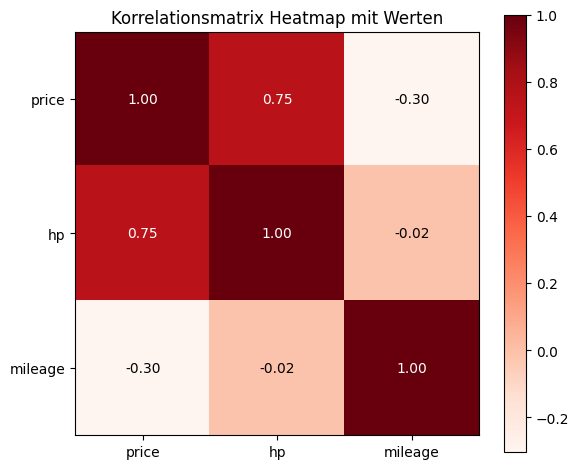

In [19]:
# 2) Korrelationsmatrix berechnen
corr = df[['price', 'hp', 'mileage']].corr().values
labels = ['price', 'hp', 'mileage']

# 3) Heatmap plotten
plt.figure(figsize=(6, 5))
im = plt.imshow(corr, interpolation='nearest', cmap='Reds')
plt.colorbar(im)

# 4) Achsen beschriften
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

# 5) Werte annotieren
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f"{corr[i, j]:.2f}",
                 ha='center', va='center',
                 color='white' if abs(corr[i, j]) > 0.5 else 'black')

plt.title('Korrelationsmatrix Heatmap mit Werten')
plt.tight_layout()
plt.show()

In [ ]:
# 3) Alle Verkaufsjahre sortiert
years = sorted(df_clean['year'].unique())

# 4) Korrelationen sammeln
corr_price_hp      = []
corr_price_mileage = []
corr_hp_mileage    = []

for year in years:
    sub = df_clean[df_clean['year'] == year]
    c   = sub[['price','hp','mileage']].corr()
    corr_price_hp.append(c.loc['price','hp'])
    corr_price_mileage.append(c.loc['price','mileage'])
    corr_hp_mileage.append(c.loc['hp','mileage'])

# 5) Plot bauen
plt.figure(figsize=(10, 6))
plt.plot(years, corr_price_hp,      marker='x', label='price vs. HP')
plt.plot(years, corr_price_mileage, marker='x', label='price vs. mileage')
plt.plot(years, corr_hp_mileage,    marker='x', label='HP vs. mileage')

plt.xticks(years, rotation=45)
plt.xlabel('Verkaufsjahr')
plt.ylabel('Korrelationswert')
plt.title('Jährliche Korrelationen zwischen price, HP und mileage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# 2) Verkäufe pro Jahr aggregieren
sales_per_year = df['year'].value_counts().sort_index().reset_index()
sales_per_year.columns = ['Verkaufsjahr', 'Anzahl Verkäufe']

# 3) Tabelle ausgeben
print(sales_per_year)

    Verkaufsjahr  Anzahl Verkäufe
0           2011             4112
1           2012             4221
2           2013             4266
3           2014             4180
4           2015             4214
5           2016             4266
6           2017             4223
7           2018             4223
8           2019             4233
9           2020             4286
10          2021             4181


In [10]:
# Durchschnittspreis pro Hersteller
avg_price_by_make = (
    df.groupby('make')['price']
      .mean()
      .round(2)
      .reset_index()
      .sort_values(by='price', ascending=False)
)
avg_price_by_make.columns = ['Hersteller', 'Durchschnittspreis (€)']

avg_price_by_make.head(20)

,Hersteller,Durchschnittspreis (€)
46,Maybach,450479.33
27,Ferrari,324028.18
39,Lamborghini,305698.78
48,McLaren,204967.27
62,Rolls-Royce,196266.67
10,Bentley,184433.53
6,Aston,160063.17
17,Corvette,110160.00
59,Porsche,89934.63
45,Maserati,72480.58


In [11]:
# 2) Durchschnittspreis je Hersteller berechnen
avg_price = df.groupby('make')['price'].mean()

# 3) Top-15 Marken nach Durchschnittspreis auswählen
top15 = avg_price.sort_values(ascending=False).head(15).index.tolist()

# 4) Verkaufszahlen pro Jahr für diese Marken aggregieren
sales = (
    df[df['make'].isin(top15)]
      .groupby(['make', 'year'])
      .size()
      .reset_index(name='Anzahl Verkäufe')
)

# 5) Pivot-Tabelle bauen: Zeilen=Marke, Spalten=Jahr
pivot = sales.pivot(index='make', columns='year', values='Anzahl Verkäufe') \
             .fillna(0) \
             .astype(int)

# 6) Optional: Reihenfolge nach Top15 beibehalten
pivot = pivot.loc[top15]

print(pivot)

year         2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021
make                                                                         
Maybach         0     0     0     0     0     0     0     1     2     0     0
Ferrari         0     1     2     0     0     1     1     2     0     0     4
Lamborghini     0     0     1     0     4     1     0     0     1     0     2
McLaren         0     1     0     0     0     1     4     0     4     0     1
Rolls-Royce     0     0     0     1     1     0     1     0     0     0     0
Bentley         1     2     1     0     0     1     1     0     1     6     2
Aston           1     1     1     0     1     1     4     0     1     5    15
Corvette        0     0     0     0     0     0     1     1     1     0     0
Porsche        14    18     3    10    13    14    30    46    35    11    50
Maserati        0     0     0     0     0     3     2     6     0     0     1
FISKER          0     1     0     0     0     0     0     0     

In [12]:
col = "offerType"
unique_vals = df[col].dropna().unique()
print(unique_vals)

['Used' 'Demonstration' "Employee's car" 'Pre-registered' 'New']


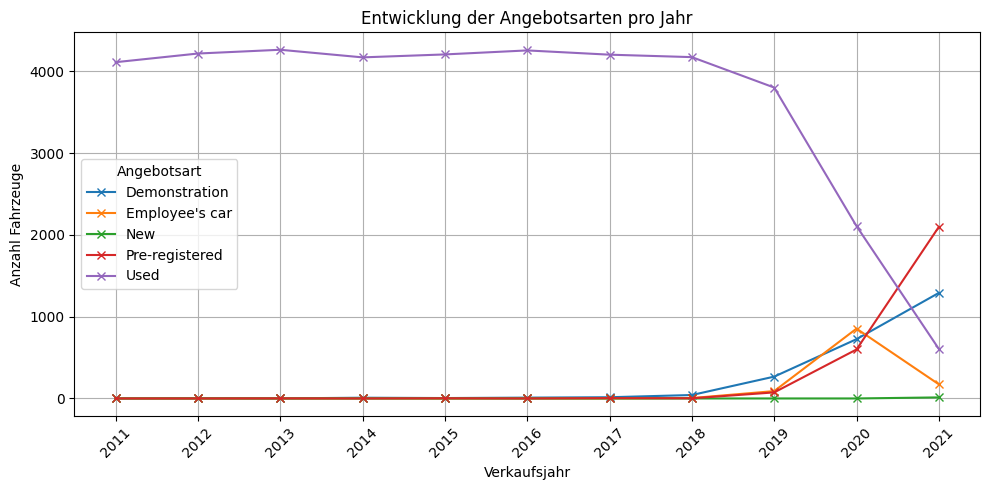

In [13]:
df_clean = df.dropna(subset=['offerType', 'year'])

# 3) Anzahl je Jahr und Angebotsart
sales = (
    df_clean
      .groupby(['year', 'offerType'])
      .size()
      .reset_index(name='count')
)

# 4) Pivot-Tabelle für die Linien
pivot = sales.pivot(index='year', columns='offerType', values='count').fillna(0)

# 5) Plot erzeugen
plt.figure(figsize=(10, 5))
for offer_type in pivot.columns:
    plt.plot(pivot.index, pivot[offer_type], marker='x', label=offer_type)

plt.xticks(pivot.index, rotation=45)
plt.xlabel('Verkaufsjahr')
plt.ylabel('Anzahl Fahrzeuge')
plt.title('Entwicklung der Angebotsarten pro Jahr')
plt.legend(title='Angebotsart')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Pivot mit Rohzahlen
pivot = df.groupby(['year','offerType']).size().unstack(fill_value=0)
print(pivot)

offerType  Demonstration  Employee's car  New  Pre-registered  Used
year                                                               
2011                   0               0    0               0  4112
2012                   3               0    0               0  4218
2013                   1               0    0               1  4264
2014                   9               0    0               0  4171
2015                   5               0    0               2  4207
2016                  10               0    0               0  4256
2017                  15               0    0               4  4204
2018                  42               5    0               2  4174
2019                 267              90    0              74  3802
2020                 725             854    0             599  2108
2021                1291             173   13            2098   606


In [15]:
prop = pivot.div(pivot.sum(axis=1), axis=0)
print((prop * 100).round(1))  # Prozentanteile je Jahr

offerType  Demonstration  Employee's car  New  Pre-registered   Used
year                                                                
2011                 0.0             0.0  0.0             0.0  100.0
2012                 0.1             0.0  0.0             0.0   99.9
2013                 0.0             0.0  0.0             0.0  100.0
2014                 0.2             0.0  0.0             0.0   99.8
2015                 0.1             0.0  0.0             0.0   99.8
2016                 0.2             0.0  0.0             0.0   99.8
2017                 0.4             0.0  0.0             0.1   99.6
2018                 1.0             0.1  0.0             0.0   98.8
2019                 6.3             2.1  0.0             1.7   89.8
2020                16.9            19.9  0.0            14.0   49.2
2021                30.9             4.1  0.3            50.2   14.5


In [16]:
for t in df['offerType'].unique():
    for y in years:
        sub = df[(df['offerType']==t)&(df['year']==y)].dropna(subset=['price','mileage'])
        if len(sub) > 10:
            print(t, y, sub['price'].corr(sub['mileage']))

NameError: name 'years' is not defined

In [17]:
import statsmodels.formula.api as smf
lm = smf.ols("price ~ mileage + C(offerType)", data=df.dropna(subset=['price','mileage','offerType'])).fit()
print(lm.params['mileage'])


-0.07717563979567078


In [18]:
col = "gear"
unique_vals = df[col].dropna().unique()
print(unique_vals)

['Manual' 'Automatic' 'Semi-automatic']


In [51]:
col = "fuel"
unique_vals = df[col].dropna().unique()
print(unique_vals)

['Diesel' 'Gasoline' 'Electric/Gasoline' '-/- (Fuel)' 'Electric'
 'Electric/Diesel' 'CNG' 'LPG' 'Others' 'Hydrogen' 'Ethanol']


In [53]:
import numpy as np

# leere Liste für Ergebnisse
results = []

# für jede Kategorie und jedes Jahr
for t in df['offerType'].dropna().unique():
    for y in sorted(df['year'].unique()):
        sub = df[(df['offerType']==t) & (df['year']==y)].dropna(subset=['price','mileage'])
        n = len(sub)
        if n >= 30:  # nur Jahre mit ausreichend Daten nehmen
            r = sub['price'].corr(sub['mileage'])
            results.append((t, y, n, r))

# als DataFrame darstellen
corr_df = pd.DataFrame(results, columns=['offerType','year','n','r'])
print(corr_df)


         offerType  year     n         r
0             Used  2011  4112 -0.078602
1             Used  2012  4218 -0.054807
2             Used  2013  4264 -0.053778
3             Used  2014  4171 -0.052653
4             Used  2015  4207 -0.063255
5             Used  2016  4256 -0.060131
6             Used  2017  4204 -0.073498
7             Used  2018  4174 -0.083741
8             Used  2019  3802 -0.036175
9             Used  2020  2108  0.110268
10            Used  2021   606  0.079844
11   Demonstration  2018    42  0.593834
12   Demonstration  2019   267 -0.004622
13   Demonstration  2020   725  0.194045
14   Demonstration  2021  1291  0.327286
15  Employee's car  2019    90  0.049655
16  Employee's car  2020   854  0.038008
17  Employee's car  2021   173  0.393220
18  Pre-registered  2019    74  0.203003
19  Pre-registered  2020   599  0.061798
20  Pre-registered  2021  2098  0.150461


In [54]:
import statsmodels.formula.api as smf  
lm = smf.ols("price ~ mileage + C(offerType)", data=df).fit()  
print(lm.params['mileage'])

-0.07717563979567078


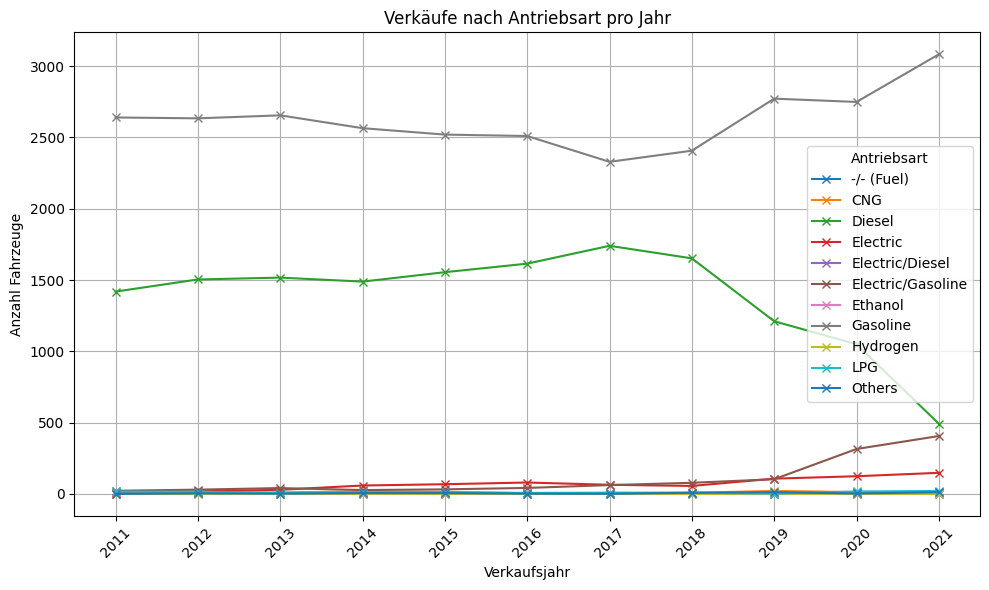

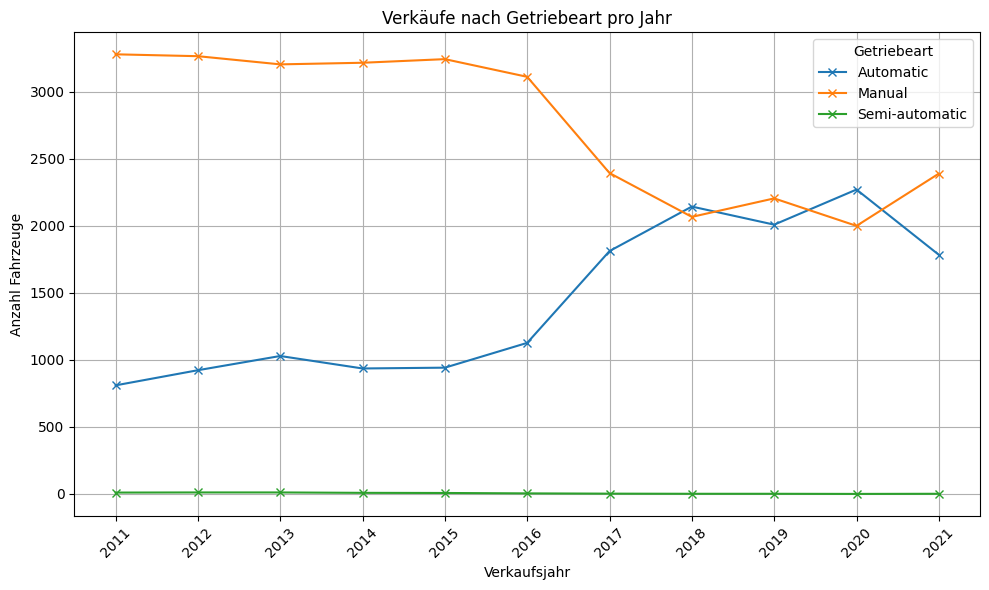

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) CSV laden (Pfad ggf. anpassen)
df = pd.read_csv('autoscout24.csv')

# 2) Auf vollständige Einträge prüfen
df_drive = df.dropna(subset=['fuel', 'year'])
df_gear  = df.dropna(subset=['gear', 'year'])

# 3a) Anzahl je Jahr und Antriebsart
drive_counts = (
    df_drive
      .groupby(['year', 'fuel'])
      .size()
      .reset_index(name='count')
)
drive_pivot = drive_counts.pivot(index='year', columns='fuel', values='count').fillna(0)

# 3b) Anzahl je Jahr und Getriebeart
gear_counts = (
    df_gear
      .groupby(['year', 'gear'])
      .size()
      .reset_index(name='count')
)
gear_pivot = gear_counts.pivot(index='year', columns='gear', values='count').fillna(0)

# 4a) Lineplot Antriebsarten
plt.figure(figsize=(10, 6))
for fuel in drive_pivot.columns:
    plt.plot(drive_pivot.index, drive_pivot[fuel], marker='x', label=fuel)
plt.xticks(drive_pivot.index, rotation=45)
plt.xlabel('Verkaufsjahr')
plt.ylabel('Anzahl Fahrzeuge')
plt.title('Verkäufe nach Antriebsart pro Jahr')
plt.legend(title='Antriebsart')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4b) Lineplot Getriebearten
plt.figure(figsize=(10, 6))
for gear in gear_pivot.columns:
    plt.plot(gear_pivot.index, gear_pivot[gear], marker='x', label=gear)
plt.xticks(gear_pivot.index, rotation=45)
plt.xlabel('Verkaufsjahr')
plt.ylabel('Anzahl Fahrzeuge')
plt.title('Verkäufe nach Getriebeart pro Jahr')
plt.legend(title='Getriebeart')
plt.grid(True)
plt.tight_layout()
plt.show()


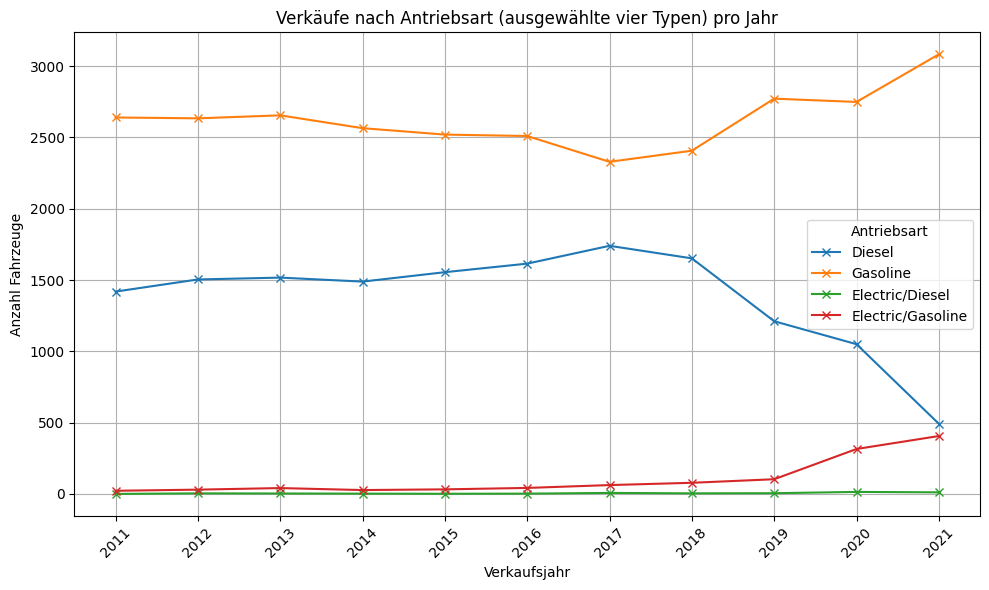

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv('autoscout24.csv')

# Relevante Antriebsarten
selected = ['Diesel', 'Gasoline', 'Electric/Diesel', 'Electric/Gasoline']

# Filtern und auf vollständige Jahr-Einträge prüfen
df_sel = df[df['fuel'].isin(selected)].dropna(subset=['year'])

# Anzahl je Jahr und Antriebsart
cnt = (
    df_sel
      .groupby(['year','fuel'])
      .size()
      .reset_index(name='count')
)

# Pivot für den Plot
pivot = cnt.pivot(index='year', columns='fuel', values='count').fillna(0)

# Plot
plt.figure(figsize=(10,6))
for fuel in selected:
    plt.plot(pivot.index, pivot[fuel], marker='x', label=fuel)

plt.xticks(pivot.index, rotation=45)
plt.xlabel('Verkaufsjahr')
plt.ylabel('Anzahl Fahrzeuge')
plt.title('Verkäufe nach Antriebsart (ausgewählte vier Typen) pro Jahr')
plt.legend(title='Antriebsart')
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
shares = df.groupby(['year','fuel']).size().unstack().div(
            df.groupby('year').size(), axis=0)
print(shares[['Diesel','Gasoline']].round(3))

fuel  Diesel  Gasoline
year                  
2011   0.345     0.642
2012   0.356     0.624
2013   0.356     0.622
2014   0.356     0.614
2015   0.369     0.598
2016   0.379     0.588
2017   0.412     0.552
2018   0.391     0.570
2019   0.286     0.655
2020   0.245     0.641
2021   0.118     0.737


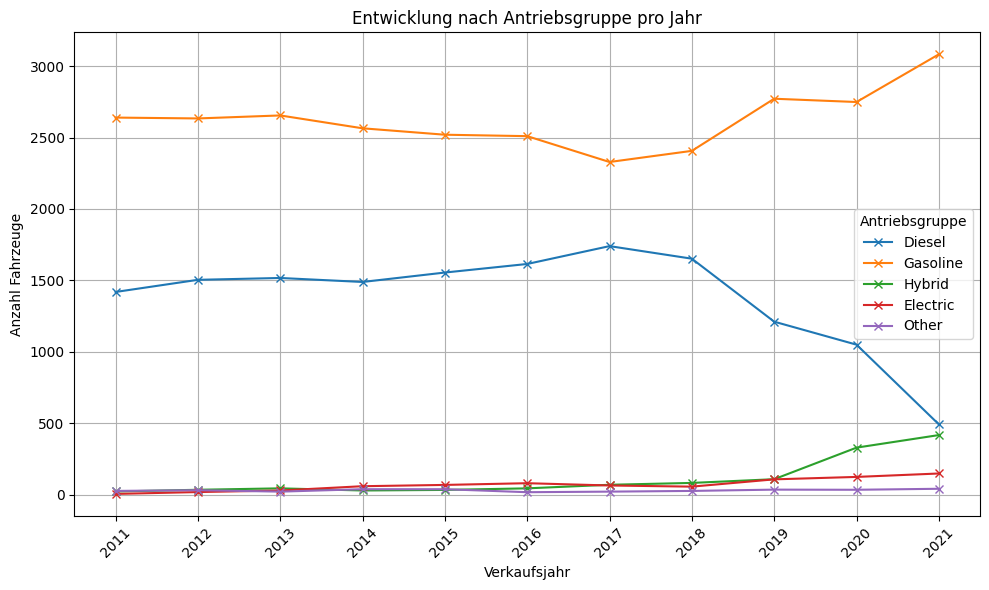

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) CSV laden
df = pd.read_csv('autoscout24.csv')

# 2) Neue Kategorie „drive_group“ definieren
def map_drive(f):
    if f == 'Diesel':
        return 'Diesel'
    if f == 'Gasoline':
        return 'Gasoline'
    if f in ['Electric/Gasoline', 'Electric/Diesel']:
        return 'Hybrid'
    if f == 'Electric':
        return 'Electric'
    return 'Other'  # CNG, LPG, Hydrogen, Ethanol, -/- (Fuel), Others

df['drive_group'] = df['fuel'].map(map_drive)

# 3) Nur gültige Jahre und drive_group
dfg = df.dropna(subset=['drive_group','year'])

# 4) Zählen pro Jahr und Gruppe
cnt = (
    dfg
      .groupby(['year','drive_group'])
      .size()
      .reset_index(name='count')
)
pivot = cnt.pivot(index='year', columns='drive_group', values='count').fillna(0)

# 5) Plot bauen
plt.figure(figsize=(10,6))
for grp in ['Diesel','Gasoline','Hybrid','Electric','Other']:
    plt.plot(pivot.index, pivot.get(grp, [0]*len(pivot.index)), marker='x', label=grp)

plt.xticks(pivot.index, rotation=45)
plt.xlabel('Verkaufsjahr')
plt.ylabel('Anzahl Fahrzeuge')
plt.title('Entwicklung nach Antriebsart pro Jahr')
plt.legend(title='Antriebsart')
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
# Beispiel: Partialkorrelation mit statsmodels
import statsmodels.formula.api as smf
lm = smf.ols("price ~ hp + C(make)", data=df_clean).fit()
print(lm.params["hp"], lm.pvalues["hp"])

165.56581698605035 0.0


C:\Users\PC\AppData\Local\Temp\ipykernel_21612\161983741.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby(['mileage_bin','offerType'])['price'].mean().reset_index()


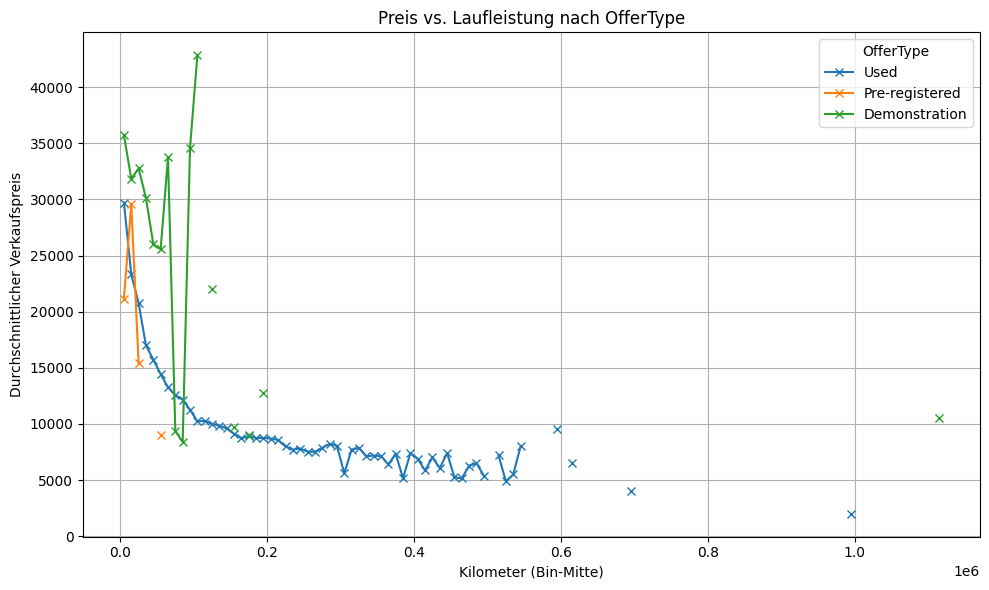

In [61]:
# 2) Mileage-Bins anlegen (z.B. je 10.000 km)
bins = np.arange(0, df['mileage'].max()+10000, 10000)
df['mileage_bin'] = pd.cut(df['mileage'], bins)

# 3) Durchschnittspreis je OfferType & Mileage-Bin berechnen
grp = df.groupby(['mileage_bin','offerType'])['price'].mean().reset_index()

# 4) Plot: Price vs. Mileage-Bin für die drei Typen
plt.figure(figsize=(10,6))
for ot in ['Used','Pre-registered','Demonstration']:
    sub = grp[grp['offerType']==ot]
    # Konvertiere Bin-Typ zu Mitte für X-Achse
    mids = sub['mileage_bin'].apply(lambda x: x.left + (x.right-x.left)/2)
    plt.plot(mids, sub['price'], marker='x', label=ot)

plt.xlabel('Kilometer (Bin-Mitte)')
plt.ylabel('Durchschnittlicher Verkaufspreis')
plt.title('Preis vs. Laufleistung nach OfferType')
plt.legend(title='OfferType')
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
# Basis-Modell ohne OfferType
m1 = smf.ols("price ~ mileage + hp + C(make)", data=df).fit()

# Modell mit OfferType-Dummies
m2 = smf.ols("price ~ mileage + hp + C(make) + C(offerType)", data=df).fit()

print("Ohne OfferType:    R² =", m1.rsquared, "AIC =", m1.aic)
print("Mit OfferType:     R² =", m2.rsquared, "AIC =", m2.aic)


Ohne OfferType:    R² = 0.7509500235658244 AIC = 982603.1192000567
Mit OfferType:     R² = 0.7605040815522743 AIC = 980797.0194615566


In [63]:
print(m2.params.filter(like='C(offerType)'))


C(offerType)[T.Employee's car]   -4598.022977
C(offerType)[T.New]               -865.353413
C(offerType)[T.Pre-registered]   -4863.593175
C(offerType)[T.Used]             -8537.163006
dtype: float64
